In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import pandas_gbq
import pydata_google_auth

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
    '/content/drive/MyDrive/ML_works/Internet_sathi/IS_ML_PROBLEMS/infra-211714-43d7a312e424 (1).json')
project_id = 'infra-211714'
client = bigquery.Client(credentials= credentials,project=project_id)

In [106]:
original_data= client.query('''with
ccf as (
select  id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_bain` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_Busara` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_beneficiaryprofile` union
all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_cisco` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_Feedback` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_googlebolo` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_hulplastic` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_internetsafety` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_kantar` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_multilink` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_plasticconsumption` union
all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_redbus` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_undpharyana` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_undpkarnataka` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_Unicef` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_washprogramme` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt from
`infra-211714.is_dashboard.clientformdatas_tataamc` 
),
ccf_assess as (
select  id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt, assessmentScore from
`infra-211714.is_dashboard.clientformdatas_bain` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt, assessmentScore from
`infra-211714.is_dashboard.clientformdatas_cisco` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt, assessmentScore from
`infra-211714.is_dashboard.clientformdatas_googlebolo` union all

select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt,assessmentScore from
`infra-211714.is_dashboard.clientformdatas_hulplastic` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt,assessmentScore from
`infra-211714.is_dashboard.clientformdatas_multilink` union all

select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt,assessmentScore from
`infra-211714.is_dashboard.clientformdatas_redbus` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt ,language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt,assessmentScore from
`infra-211714.is_dashboard.clientformdatas_undpharyana` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt,assessmentScore from
`infra-211714.is_dashboard.clientformdatas_undpkarnataka` union all
select id, formId, transactionID, formUniqueId, isActive, createdAt,
modifiedAt, language, location, timeTaken, deviceId, loginId,
internetSathiProfileId, village, block, district, state, partner,
mobileCreatedAt, mobileUpdatedAt,assessmentScore from
`infra-211714.is_dashboard.clientformdatas_tataamc` 
),
question as (select count(distinct  question) as count,formId from
`infra-211714.is_dashboard.formquestions` group by formId  ),
preass as (select cf.deviceId,cf.formId, avg(cf.assessmentScore)as
mean_assscore  from
ccf_assess
as cf
group by deviceId, formId),
livelihoodSaathi as (SELECT distinct deviceId FROM
`infra-211714.is_dashboard.saathiprofiles`),
overallDate as (select cf.deviceId,MIN(cf.createdAt) as
StartDate,MAX(cf.createdAt) as EndDate from
ccf as cf join livelihoodSaathi on cf.deviceId =
livelihoodSaathi.deviceId group by cf.deviceID),
sp as ( SELECT  id, ARRAY_AGG( fl ORDER BY modifiedAt DESC LIMIT 1
)[OFFSET(0)].* EXCEPT (id) FROM
`infra-211714.is_dashboard.saathiprofiles` as fl  GROUP BY id),
WorkingDuration as (select b.deviceId,count(distinct
Date(cf.mobileCreatedAt  )) as
OnFieldDaysCount,DATE_DIFF(DATE(overallDate.EndDate),DATE(overallDate.StartDate)
,day) as SystemDaysCount from sp as b  join ccf  as cf on cf.deviceId
= b.deviceId join overallDate on overallDate.deviceId = cf.deviceId
group
by b.deviceId,overallDate.StartDate,overallDate.EndDate),
vilblkCount as (select deviceId,count(distinct village) as
vil,count(distinct block) as blk from ccf group by deviceId),
forms as( SELECT formId, ARRAY_AGG( forms ORDER BY modifiedAt DESC
LIMIT 1 )[OFFSET(0)].* EXCEPT (formid) FROM
`infra-211714.is_dashboard.forms` as forms GROUP BY formId)

select
DISTINCT mt.deviceId,
  name,
  husbandprofession,
  NoOfFormsWorked,
   NoOfBeneficiaryToBeFilled,
count(distinct ccf.id) as BeneficiariesFilled,
  vill_count,
  block_count,
  OnFieldDaysCount,
  SystemDaysCount,
  meanTimePerQuestion,
  meantimeperform,
  percent_ass_score,
  engagedWithLivelihoodActivity,
  otherLivelihoodActivity,
  numberOfChildren,
  educationalQualification,
  age,
  haveAadhaarCard,
  haveAtmCard,
  mt.village,
  mt.district,
  mt.state
from

(SELECT
  DISTINCT mainTable.deviceId,
  name,
  husbandprofession,
  count(mainTable.formId) as NoOfFormsWorked,
  sum(forms.fillCount) as NoOfBeneficiaryToBeFilled,
  vilblkCount.vil AS vill_count,
  vilblkCount.blk AS block_count,
  sum(OnFieldDaysCount) as OnFieldDaysCount,
  sum(SystemDaysCount)+1 AS SystemDaysCount,
  SUM(questionsinform)/SUM(mean_time_per_form) AS meanTimePerQuestion,
  AVG(mean_time_per_form) AS meantimeperform,
  AVG(percent_ass_marks) AS percent_ass_score,
  engagedWithLivelihoodActivity,
  otherLivelihoodActivity,
  numberOfChildren,
  educationalQualification,
  age,
  haveAadhaarCard,
  haveAtmCard,
  mainTable.village,
  mainTable.district,
  mainTable.state
FROM (
  SELECT
    DISTINCT cf.deviceId,
    cf.name,
    cf.husbandProfession,
    mp.formId,
    WorkingDuration.OnFieldDaysCount,
    WorkingDuration.SystemDaysCount,
    question.count AS Questionsinform,
--     cf1.noOfAttempts,
    AVG(mp.timeTaken/1000) AS mean_time_per_form,
    AVG(mp.timeTaken/1000)/question.count AS meanTimePerQuestion,
    preass.mean_assscore*100/question.count AS percent_ass_marks,
    cf.engagedWithLivelihoodActivity,
    cf.otherLivelihoodActivity,
    cf.numberOfChildren,
    cf.educationalQualification,
    cf.age,
    cf.haveAadhaarCard,
    cf.haveAtmCard,
    m.name AS village,
    ds.name AS district,
    st.name AS state
  FROM (
    SELECT
      *,
      DATE_DIFF(max_crd,min_crd,day) AS work_duration
    FROM (
      SELECT
        a.deviceId,
        CAST(MAX(b.createdAt) AS date) AS max_crd,
        CAST(MIN(b.createdAt) AS date) AS min_crd
      FROM
       sp AS a
      INNER JOIN
        ccf AS b
      ON
        a.deviceId=b.deviceid
      GROUP BY
        a.deviceid)) AS k
  INNER JOIN
    sp AS cf
  ON
    cf.deviceId =k.deviceId
  LEFT JOIN
    `is_dashboard.villages` AS m
  ON
    m.id=cf.village
  LEFT JOIN
    `is_dashboard.districts` AS ds
  ON
    ds.id=m.district
  LEFT JOIN
    `is_dashboard.states` AS st
  ON
    st.id=m.state
  LEFT JOIN
    ccf AS cf1
  ON
    cf.deviceid=cf1.deviceid
  LEFT JOIN (
    SELECT
      deviceId,
      formId,
      timetaken
    FROM
      ccf
    WHERE
      deviceId!="null") AS mp
  ON
    cf.deviceId=mp.deviceId
  JOIN
    question
  ON
    question.formId = mp.formId
  LEFT JOIN
    preass
  ON
    preass.deviceId=cf.deviceId
  JOIN
    WorkingDuration
  ON
    WorkingDuration.deviceId = cf.deviceId
  GROUP BY
    deviceId,
    formId,
    cf.name,
    cf.numberOfChildren,
    cf.engagedWithLivelihoodActivity,
    cf.husbandProfession,
    cf.otherLivelihoodActivity,
    cf.educationalQualification,
    cf.age,
    m.name,
    ds.name,
    st.name,
    question.count,
    question.formId,
    preass.mean_assscore,
    WorkingDuration.OnFieldDaysCount,
    WorkingDuration.SystemDaysCount,
    cf.haveAadhaarCard,
    cf.haveAtmCard) AS mainTable
JOIN
  vilblkCount
ON
  vilblkCount.deviceId = mainTable.deviceId
join forms on forms.formId = mainTable.formId
GROUP BY
  deviceId,
  name,
  husbandprofession,
  engagedWithLivelihoodActivity,
  otherLivelihoodActivity,
  numberOfChildren,
  educationalQualification,
  age,
  haveAadhaarCard,
  haveAtmCard,
  village,
  district,
  state,
  vill_count,
  block_count) as mt join ccf on ccf.deviceId = mt.deviceId group by
mt.deviceId, name,
  husbandprofession,
  NoOfFormsWorked,
   NoOfBeneficiaryToBeFilled,
  vill_count,
  block_count,
  OnFieldDaysCount,
  SystemDaysCount,
  meanTimePerQuestion,
  meantimeperform,
  percent_ass_score,
  engagedWithLivelihoodActivity,
  otherLivelihoodActivity,
  numberOfChildren,
  educationalQualification,
  age,
  haveAadhaarCard,
  haveAtmCard,
  mt.village,
  mt.district,
  mt.state
''').result().to_dataframe()

In [107]:
#Data corrections and feature engineering
num_fit=['engagedWithLivelihoodActivity',"numberOfChildren","educationalQualification","age","haveAadhaarCard","haveAtmCard"]
original_data[num_fit]=original_data[num_fit].apply(pd.to_numeric)
original_data["percent_target_match"]=original_data.BeneficiariesFilled*100/original_data.NoOfBeneficiaryToBeFilled
data=original_data

In [108]:
perf=data["percent_ass_score"]

In [109]:
perf.describe()

count    9909.000000
mean      136.714268
std       117.477867
min       -14.042934
25%        47.085475
50%        66.378066
75%       254.440559
max       758.318426
Name: percent_ass_score, dtype: float64

In [110]:
data=data.interpolate().backfill().ffill()

In [111]:
cl=["NoOfFormsWorked","NoOfBeneficiaryToBeFilled","BeneficiariesFilled",
    "vill_count","block_count","OnFieldDaysCount","SystemDaysCount","meanTimePerQuestion","meantimeperform",
    "engagedWithLivelihoodActivity","numberOfChildren","educationalQualification",
    "age","percent_target_match"]

In [112]:
newdata=data[cl]
#newdata["assessment_score"]=pd.Series(data["percent_ass_score"].values)

In [113]:
newdata=newdata.astype(int)

In [114]:
newdata["NoOfFormsWorked"]=(newdata["NoOfFormsWorked"]-min(newdata["NoOfFormsWorked"]))/(max(newdata["NoOfFormsWorked"])-min(newdata["NoOfFormsWorked"]))
newdata["NoOfBeneficiaryToBeFilled"]=(newdata["NoOfBeneficiaryToBeFilled"]-min(newdata["NoOfBeneficiaryToBeFilled"]))/(max(newdata["NoOfBeneficiaryToBeFilled"])-min(newdata["NoOfBeneficiaryToBeFilled"]))
newdata["BeneficiariesFilled"]=(newdata["BeneficiariesFilled"]-min(newdata["BeneficiariesFilled"]))/(max(newdata["BeneficiariesFilled"])-min(newdata["BeneficiariesFilled"]))
newdata["vill_count"]=(newdata["vill_count"]-min(newdata["vill_count"]))/(max(newdata["vill_count"])-min(newdata["vill_count"]))
newdata["block_count"]=(newdata["block_count"]-min(newdata["block_count"]))/(max(newdata["block_count"])-min(newdata["block_count"]))
newdata["OnFieldDaysCount"]=(newdata["OnFieldDaysCount"]-min(newdata["OnFieldDaysCount"]))/(max(newdata["OnFieldDaysCount"])-min(newdata["OnFieldDaysCount"]))
newdata["SystemDaysCount"]=(newdata["SystemDaysCount"]-min(newdata["SystemDaysCount"]))/(max(newdata["SystemDaysCount"])-min(newdata["SystemDaysCount"]))
newdata["meanTimePerQuestion"]=(newdata["meanTimePerQuestion"]-min(newdata["meanTimePerQuestion"]))/(max(newdata["meanTimePerQuestion"])-min(newdata["meanTimePerQuestion"]))
newdata["meantimeperform"]=(newdata["meantimeperform"]-min(newdata["meantimeperform"]))/(max(newdata["meantimeperform"])-min(newdata["meantimeperform"]))

In [115]:
newdata["engagedWithLivelihoodActivity"]=(newdata["engagedWithLivelihoodActivity"]-min(newdata["engagedWithLivelihoodActivity"]))/(max(newdata["engagedWithLivelihoodActivity"])-min(newdata["engagedWithLivelihoodActivity"]))
newdata["numberOfChildren"]=(newdata["numberOfChildren"]-min(newdata["numberOfChildren"]))/(max(newdata["numberOfChildren"])-min(newdata["numberOfChildren"]))
newdata["educationalQualification"]=(newdata["educationalQualification"]-min(newdata["educationalQualification"]))/(max(newdata["educationalQualification"])-min(newdata["educationalQualification"]))
newdata["age"]=(newdata["age"]-min(newdata["age"]))/(max(newdata["age"])-min(newdata["age"]))
newdata["percent_target_match"]=(newdata["percent_target_match"]-min(newdata["percent_target_match"]))/(max(newdata["percent_target_match"])-min(newdata["percent_target_match"]))

In [116]:
newdata["assessment_score"]=perf

In [117]:
used=newdata[newdata.assessment_score.notnull()]

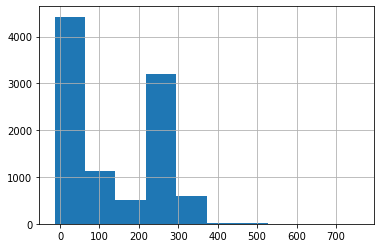

In [118]:
used.assessment_score.hist()

In [119]:
used["class"]=used.assessment_score.apply(lambda x:1 if x>66 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x=used.iloc[:,:-1]
y=used["class"]

In [122]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [123]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [124]:
mdl_logreg=LogisticRegression().fit(x_train,y_train)
mdl_xgb=xgb.XGBClassifier().fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [125]:
pred=mdl_xgb.predict(x_test)

In [126]:
prob=mdl_xgb.predict_proba(x_test)

In [127]:
prob_list=[]
for i in range(len(prob)):
  prob_list.append(prob[i][0])
prob_list=pd.Series(prob_list, index=y_test.index)
prob_list=prob_list.apply(lambda x:1 if x>0.5 else 0)

In [128]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [129]:
pd.crosstab(y_test, pred)

col_0,0,1
class,,
0,980,0
1,0,1002


In [130]:
f1_score(y_test,pred)

1.0

In [149]:
used=newdata[newdata.assessment_score.notnull()]

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
x=used.iloc[:,:-1]
y=used.assessment_score.apply(lambda x:(x-min(used.assessment_score))/(max(used.assessment_score)-min(used.assessment_score)))

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [155]:
y_test.head()

10223    0.100387
9652     0.454873
15850    0.363301
32224    0.022984
10841    0.022323
Name: assessment_score, dtype: float64

In [160]:
rfr=RandomForestRegressor(random_state=10)

In [156]:
mdl=LinearRegression().fit(x_train,y_train)

In [162]:
mdl=rfr.fit(x_train,y_train)

In [163]:
pred=pd.Series(mdl.predict(x_test), index=y_test.index)

In [164]:
pred

10223    0.168331
9652     0.387281
15850    0.336319
32224    0.026015
10841    0.022391
           ...   
16633    0.092400
10002    0.430220
31387    0.022321
2075     0.345104
2846     0.095927
Length: 2973, dtype: float64

In [165]:
sum(((y_test-pred)**2)/len(y_test))

0.001601849983213647

In [ ]:
def cat_cont_divider(data):
  cat_col=[]
  cont_col=[]
  for col in data.columns:
    if len (data[str(col)].value_counts())<20:
      cat_col.append(str(col))
    else:
      cont_col.append(col)
  return cat_col, cont_col

In [ ]:
useful=data[data.percent_ass_score.notna()]

In [ ]:
useful_cont=useful[list(set(useful.select_dtypes(include=["int64","float64"]).columns).difference(set(cat_cont_divider(useful)[0])))]
useful_cat=useful[list(set(cat_cont_divider(useful)[0]).difference(set(useful.select_dtypes(include=["object"]).columns)))]
useful_cat["percent_ass_score"]=useful_cont.percent_ass_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
model_cont=useful_cont.corr()[abs(useful_cont.corr().percent_ass_score)>0.2].T.columns
model_cat=useful_cat.corr()[abs(useful_cat.corr().percent_ass_score)>0.2].T.columns
output_feature="percent_ass_score"
model_var=list(set(model_cont.append(model_cat)))
model_var.remove(output_feature)

In [ ]:
x=useful[model_var].interpolate()
y=useful[output_feature]

In [ ]:
lm=LinearRegression()
rfr=RandomForestRegressor(random_state=10)
dtr=DecisionTreeRegressor(random_state=10)
xgbr=xgb.XGBRegressor()

In [ ]:
score_lm=int(abs(cross_val_score(lm, x,y, cv=10, scoring='neg_mean_squared_error')).mean())
score_rfr=int(abs(cross_val_score(rfr, x,y, cv=10, scoring='neg_mean_squared_error')).mean())
score_dtr=int(abs(cross_val_score(dtr, x,y,cv=10, scoring='neg_mean_squared_error')).mean())
score_xgb=int(abs(cross_val_score(xgbr, x,y,cv=10, scoring='neg_mean_squared_error')).mean())
scores=[score_lm, score_rfr, score_dtr, score_xgb]

[09:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
model_name=["lm","rfr","dtr","xgbr"]
df=pd.DataFrame()
df["mdl_name"]=model_name
df["accuracy"]=scores
best_mdl=df.loc[df.accuracy.nsmallest(1).index,].mdl_name.values[0]
best_mdl

'rfr'

In [ ]:
df

,mdl_name,accuracy
0,lm,8849
1,rfr,1121
2,dtr,1956
3,xgbr,1253


In [ ]:
mdl=dict({"rfr":RandomForestRegressor(random_state=10), 
          "lm":LinearRegression(), 
          "dtr":DecisionTreeRegressor(random_state=10),
          "xgb":xgb.XGBRegressor()})

In [ ]:
demo=["deviceId","name","husbandprofession","village","district","state"]

In [ ]:
final_prediction=mdl[best_mdl].fit(x,y).predict(original_data[model_var].interpolate())
saathi_with_assessment=original_data[demo]
saathi_with_assessment["perf_score"]=pd.Series(final_prediction).apply(lambda x:round(x, 3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
topsathi=saathi_with_assessment.loc[saathi_with_assessment.sort_values("perf_score",
 ascending=False).index, :].head(int(0.05*len(original_data))).reset_index(drop=True)
bottomsathi=saathi_with_assessment.loc[saathi_with_assessment.sort_values("perf_score", ascending=False).index,:].tail(
    int(0.05*len(original_data))).reset_index(drop=True)

In [ ]:
topsathi

,deviceId,name,husbandprofession,village,district,state,perf_score
0,5b729bdd397e990942e52228,Nirjala Devi,kheti,Lachhmipur,Pashchim Champaran,Bihar,529.466
1,5acefcba30ff2e25c57aed14,Rumi kumari,not,Khopira,Bhojpur,Bihar,526.089
2,5b729bdd397e990942e51f51,बसंती साहनी,na,Tetaria,Purba Champaran,Bihar,501.209
3,5ab4a30aa4c183caa548f8bb,Suman dive,ram sharan,Jarha Kalan,Jhansi,Uttar Pradesh,479.647
4,5b729bdd397e990942e521ae,seema kumari,अध्यापक,Champapur,Pashchim Champaran,Bihar,474.567
...,...,...,...,...,...,...,...
1709,5aaa459ba4c183caa589f5b7,Krishna devi,agricultural,Vijaypur Dhamola,Nainital,Uttarakhand,266.894
1710,5a75cdc451df5d2d9d4cfaa3,kirti gupta,Guardian,Pakariya,Satna,Madhya Pradesh,266.799
1711,5b07eeed31706755c3702a8f,Nisha kumari,ashok singh,Sonao,Kaimur (Bhabua),Bihar,266.799
1712,5af0019a92aa6e1aa518f620,sheela. kumari,krishi,Pareyago,Ranchi,Jharkhand,266.799


In [ ]:
list(topsathi.head().T.to_dict().values())

[{'deviceId': '5b729bdd397e990942e52228',
  'district': 'Pashchim Champaran',
  'husbandprofession': 'kheti',
  'name': 'Nirjala Devi',
  'perf_score': 529.466,
  'state': 'Bihar',
  'village': 'Lachhmipur'},
 {'deviceId': '5acefcba30ff2e25c57aed14',
  'district': 'Bhojpur',
  'husbandprofession': 'not',
  'name': 'Rumi kumari',
  'perf_score': 526.089,
  'state': 'Bihar',
  'village': 'Khopira'},
 {'deviceId': '5b729bdd397e990942e51f51',
  'district': 'Purba Champaran',
  'husbandprofession': 'na',
  'name': 'बसंती साहनी',
  'perf_score': 501.209,
  'state': 'Bihar',
  'village': 'Tetaria'},
 {'deviceId': '5ab4a30aa4c183caa548f8bb',
  'district': 'Jhansi',
  'husbandprofession': 'ram sharan',
  'name': 'Suman dive',
  'perf_score': 479.647,
  'state': 'Uttar Pradesh',
  'village': 'Jarha Kalan'},
 {'deviceId': '5b729bdd397e990942e521ae',
  'district': 'Pashchim Champaran',
  'husbandprofession': 'अध्यापक',
  'name': 'seema kumari',
  'perf_score': 474.567,
  'state': 'Bihar',
  'villa

In [ ]:
# on_field_days_count=original_data.loc[original_data.OnFieldDaysCount.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# system_days_count=original_data.loc[original_data.SystemDaysCount.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# form_count=original_data.loc[original_data.NoOfFormsWorked.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# NoOfBeneficiaryFilled_count=original_data.loc[original_data.NoOfBeneficiaryToBeFilled.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# BeneficiaryFilled_count=original_data.loc[original_data.BeneficiariesFilled.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# vill_count=original_data.loc[original_data.vill_count.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# block_count=original_data.loc[original_data.block_count.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# mean_time_per_question=original_data.loc[original_data.meanTimePerQuestion.sort_values().index].head(int(0.5*len(original_data)))
# mean_time_per_form=original_data.loc[original_data.meantimeperform.sort_values().index].head(int(0.5*len(original_data)))
# percent_ass_score=original_data.loc[original_data.percent_ass_score.sort_values(ascending=False).index].head(int(0.5*len(original_data)))
# number_of_children=original_data.loc[original_data.numberOfChildren.sort_values().index].head(int(0.5*len(original_data)))
# age_count=original_data.loc[original_data.age.sort_values().index].head(int(0.5*len(original_data)))
# percent_target_match_count=original_data.loc[original_data.percent_target_match.sort_values().index].head(int(0.5*len(original_data)))

In [ ]:
# on_field_days_match_percent=len(pd.merge(topsathi, on_field_days_count,how="inner", on=["deviceId"]))*100/len(topsathi)
# system_days_count_percent=len(pd.merge(topsathi, system_days_count, how="inner", on=["deviceId"]))*100/len(topsathi)
# form_count_match_percent=len(pd.merge(topsathi, form_count,how="inner", on=["deviceId"]))*100/len(topsathi)
# NoOfBeneficiaryFilled_match_percent=len(pd.merge(topsathi, NoOfBeneficiaryFilled_count, how="inner",on=["deviceId"]))*100/len(topsathi)
# BeneficiaryFilled_match_percent=len(pd.merge(topsathi, BeneficiaryFilled_count, how="inner",on=["deviceId"]))*100/len(topsathi)
# vill_count_match_percent=len(pd.merge(topsathi, vill_count,how="inner", on=["deviceId"]))*100/len(topsathi)
# block_count_match_percent=len(pd.merge(topsathi, block_count,how="inner", on=["deviceId"]))*100/len(topsathi)
# mtpq_match_percent=len(pd.merge(topsathi, mean_time_per_question,how="inner", on=["deviceId"]))*100/len(topsathi)
# mtpf_match_percent=len(pd.merge(topsathi, mean_time_per_form,how="inner", on=["deviceId"]))*100/len(topsathi)
# percent_ass_score_match_percent=len(pd.merge(topsathi, percent_ass_score,how="inner", on=["deviceId"]))*100/len(topsathi)
# number_of_children_match_percent=len(pd.merge(topsathi, number_of_children,how="inner", on=["deviceId"]))*100/len(topsathi)
# age_match_percent=len(pd.merge(topsathi, age_count,how="inner", on=["deviceId"]))*100/len(topsathi)
# percent_target_match_percent=len(pd.merge(topsathi, percent_target_match_count,how="inner", on=["deviceId"]))*100/len(topsathi)

In [ ]:
# match_percent=pd.DataFrame()
# match_percent["variables"]=["on_field_days_match_percent","system_days_count_percent","form_count_match_percent","vill_count_match_percent","block_count_match_percent","mtpq_match_percent","mtpf_match_percent","percent_ass_score_match_percent","number_of_children_match_percent","age_match_percent","percent_target_match_percent"]
# match_percent["percent_of_match"]=pd.Series([on_field_days_match_percent,system_days_count_percent,form_count_match_percent,vill_count_match_percent,block_count_match_percent,mtpq_match_percent,mtpf_match_percent,percent_ass_score_match_percent,number_of_children_match_percent, age_match_percent,percent_target_match_percent])

In [ ]:
# match_percent.sort_values("percent_of_match",ascending=False)

,variables,percent_of_match
10,percent_target_match_percent,82.136398
5,mtpq_match_percent,60.504055
4,block_count_match_percent,54.279214
9,age_match_percent,54.267546
8,number_of_children_match_percent,53.450791
3,vill_count_match_percent,52.593198
7,percent_ass_score_match_percent,48.637769
6,mtpf_match_percent,47.231783
1,system_days_count_percent,45.026545
0,on_field_days_match_percent,40.534391


In [ ]:
import os
os.chdir("/content/drive/My Drive/ML_works/Internet_sathi/IS_ML_PROBLEMS/prob_1_identify_the_right_fit_of_rural_woman............../all_saathi")

In [ ]:
# pd.merge(saathi_north, topsathi, how="inner", on=["name", "state", "district"]).to_csv("matched_saathi_with_algo_all.csv")
# match_percent.sort_values("percent_of_match", ascending=False).to_csv("match_percent_with_algo_all.csv")
# topsathi.to_csv("topsathi_with_algo_all.csv")
# bottomsathi.to_csv("bottomsathi_with_algo_all.csv")

In [ ]:
# topsathi_with_algo_all=topsathi
# bottomsathi_with_algo_all=bottomsathi
# topsathi_without_algo_all=pd.read_csv("topsathi_without_algo_all.csv", index_col=False)
# bottomsathi_without_algo_all=pd.read_csv("bottomsathi_without_algo_all.csv", index_col=False)

In [ ]:
# common_saathi=list(set(topsathi_with_algo_all.deviceId)&set(topsathi_without_algo_all.deviceId))

In [ ]:
# common_saathi_list=topsathi_with_algo_all[topsathi_with_algo_all.deviceId.isin(common_saathi)]

In [ ]:
# len(common_saathi_list)

1602

In [ ]:
# common_saathi_list.to_csv("top_performing_saathi_all.csv")

In [ ]:
# common_saathi_list["perf_score"]=common_saathi_list["perf_score"].apply(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# common_saathi_list.head()

,deviceId,name,husbandprofession,engagedWithLivelihoodActivity,otherLivelihoodActivity,numberOfChildren,educationalQualification,age,haveAadhaarCard,haveAtmCard,village,district,state,perf_score
1,5acefcba30ff2e25c57aed14,Rumi kumari,not,10.0,,0.0,13.0,19.0,1.0,2.0,Khopira,Bhojpur,Bihar,586
4,5ab4a30aa4c183caa548f864,Siddiqa khan,farmer,11.0,samaj sewa,0.0,11.0,36.0,1.0,2.0,Chheota,Jhansi,Uttar Pradesh,470
5,5b729bdd397e990942e521ae,seema kumari,अध्यापक,10.0,,0.0,13.0,19.0,1.0,1.0,Champapur,Pashchim Champaran,Bihar,463
6,5ab4a30aa4c183caa548f8bb,Suman dive,ram sharan,8.0,,0.0,13.0,20.0,1.0,1.0,Jarha Kalan,Jhansi,Uttar Pradesh,462
7,5b729bdd397e990942e51fd7,Ranjana devi,labour,11.0,house wife,1.0,13.0,20.0,1.0,2.0,Pipar Chafa,Gopalganj,Bihar,445


In [ ]:
# saathi_north=pd.read_csv("/content/drive/My Drive/ML_works/Internet_sathi/IS_ML_PROBLEMS/prob_1_identify_the_right_fit_of_rural_woman............../other_files/Saathi_north. - Sheet12 (1).csv")
# saathi_north.rename(columns={"Saathi Name":"name", "State":"state","District Name":"district", "Block":"block"}, inplace=True)

In [ ]:
# cross_matched_saathis=pd.merge(saathi_north, common_saathi_list, how="inner", on=["name", "state", "district"])

In [ ]:
# cross_matched_saathis.to_csv("cross_matched_saathis_all.csv")

In [ ]:
# hul_data= pandas_gbq.read_gbq('''select distinct deviceId from `infra-211714.is_dashboard.clientformdatas_tataamc` where formId in (70,71,72,73,74)
# ''',
#   project_id="infra-211714",
#   credentials=credentials,)

In [ ]:
# hul_topsathi=topsathi[topsathi.deviceId.isin (list(hul_data.deviceId))]

In [ ]:
# hul_topsathi.head()

In [ ]:
# len(common_saathi_list)

In [ ]:
# len(topsathi)

In [ ]:
# len(hul_data)

In [ ]:
# len(original_data[original_data.deviceId.isin(list(hul_data.deviceId))])

In [ ]:
# len(common_saathi_list[common_saathi_list.deviceId.isin(list(hul_data.deviceId))])

In [ ]:
# from datetime import datetime, timedelta

In [ ]:
# now=datetime.now()

In [ ]:
# btime=now-timedelta(minutes=30)

In [ ]:
# import pandas as pd
# pd.to_datetime(btime)

In [ ]:
# list(topsathi.T.to_dict().values())